In [112]:
import pandas as pd
import numpy as np
import os
import random
import openpyxl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, MaxAbsScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.figure(figsize=(15, 12))
scaler = "maxabs"


<Figure size 1080x864 with 0 Axes>

In [113]:
from itertools import islice

wb = openpyxl.load_workbook("output/pca.xlsx")
data = wb[f"data_scaled_lof_{scaler}_scaler"].values
cols = next(data)[1:]
data = list(data)
idx = [r[0] for r in data]
data = (islice(r, 1, None) for r in data)
df = pd.DataFrame(data, index=idx, columns=cols)
df

,ent,adv_curr_acc_disc_doc_loans,asset_tot_asset,deriv_assets,exp_dep_cap_loans,implied_lending_rate,implied_liable_rate,implied_spread,liquidity_ratio,loan_avg_segment_asset,loans_cap_to_banks_assets,pers_cred_card_loans,roe,LOF,outlier
0,7,0.395125,0.902293,-0.057250,0.259326,-0.123075,-0.075584,-0.048893,-0.084904,-0.699724,-0.760852,0.320345,0.140417,-0.984773,1
1,11,-0.211580,0.933155,0.017086,0.514352,-0.304987,0.299729,0.031751,0.138338,-0.878296,-0.839962,-0.341397,0.309484,-1.102233,1
2,14,0.343045,0.906136,0.001494,0.183676,-0.118693,-0.006581,0.000720,-0.216852,-0.756573,-0.839962,0.196843,-0.167431,-0.992032,1
3,15,-0.181175,0.838888,-0.058018,0.029580,-0.130819,0.054664,-0.100766,0.096201,-0.279107,-0.665789,-0.030476,0.299015,-0.999817,1
4,16,0.507030,0.831882,-0.025680,0.015838,-0.039920,0.552740,-0.332274,0.137220,-0.268024,-0.035223,0.073451,0.200657,-0.984332,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,44094,-0.192679,-0.233189,-0.024176,0.401349,-0.066437,-0.843624,0.094323,-0.168577,0.767132,0.847035,-0.748696,-0.053858,-1.117939,1
65,44096,-0.247602,-0.789908,0.003122,0.131106,-0.111625,0.921876,0.082003,-0.721889,0.342464,0.839963,-0.748696,-0.178622,-1.064076,1
66,44098,-0.789986,-0.232681,0.003122,0.529330,-0.106866,-0.753349,0.090312,0.258584,-0.925693,0.745171,-0.748695,0.413443,-1.302656,1
67,44099,-0.714519,-0.366044,0.003122,0.127882,0.035527,-1.000000,0.106242,0.272178,-0.001725,0.912705,-0.748696,-0.132449,-1.136834,1


In [114]:
from itertools import islice

# scaler = "robust"
wb = openpyxl.load_workbook("output/pca.xlsx")
data = wb[f"{scaler}_scaler_pca_2d"].values
cols = next(data)[1:]
data = list(data)
idx = [r[0] for r in data]
data = (islice(r, 1, None) for r in data)
df_pca_2d = pd.DataFrame(data, index=idx, columns=cols)
df_pca_2d = df_pca_2d[df_pca_2d["outlier"]==1]
df_pca_2d

,ent,LOF,outlier,pca1,pca2
0,7,-0.984773,1,-1.409046,-0.361552
1,11,-1.102233,1,-1.340602,-0.253519
2,14,-0.992032,1,-1.399480,-0.364416
3,15,-0.999817,1,-0.990866,-0.277553
4,16,-0.984332,1,-0.657951,-0.578445
...,...,...,...,...,...
63,44094,-1.117939,1,1.200441,0.092246
65,44096,-1.064076,1,1.361232,0.126912
66,44098,-1.302656,1,0.276910,1.115628
67,44099,-1.136834,1,0.967679,0.842520


In [115]:
from itertools import islice

# scaler = "robust"
wb = openpyxl.load_workbook("output/pca.xlsx")
data = wb[f"{scaler}_scaler_pca_3d"].values
cols = next(data)[1:]
data = list(data)
idx = [r[0] for r in data]
data = (islice(r, 1, None) for r in data)
df_pca_3d = pd.DataFrame(data, index=idx, columns=cols)
df_pca_3d = df_pca_3d[df_pca_3d["outlier"]==1]
df_pca_3d

,ent,LOF,outlier,pca1,pca2,pca3
0,7,-0.984773,1,-1.409046,-0.361552,0.181955
1,11,-1.102233,1,-1.340602,-0.253519,0.914165
2,14,-0.992032,1,-1.399480,-0.364416,0.258539
3,15,-0.999817,1,-0.990866,-0.277553,0.223558
4,16,-0.984332,1,-0.657951,-0.578445,0.387520
...,...,...,...,...,...,...
63,44094,-1.117939,1,1.200441,0.092246,0.210626
65,44096,-1.064076,1,1.361232,0.126912,0.941902
66,44098,-1.302656,1,0.276910,1.115628,0.901012
67,44099,-1.136834,1,0.967679,0.842520,0.226870


In [116]:
data_arr = df[df.columns[1:-2]].to_numpy()
display(data_arr.shape)
display(data_arr[:,0:1].shape)
data_arr_2d = df_pca_2d[df_pca_2d.columns[-2:]].to_numpy()
display(data_arr_2d.shape)
display(data_arr_2d[:,0:1].shape)

(64, 12)

(64, 1)

(64, 2)

(64, 1)

DETERMINING THE NUMBER OF CLUSTERS IN A DATA SET

ELBOW METHOD - KMEANS

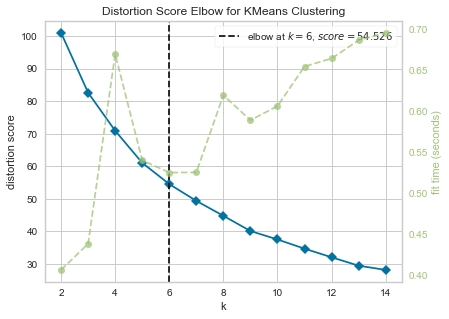

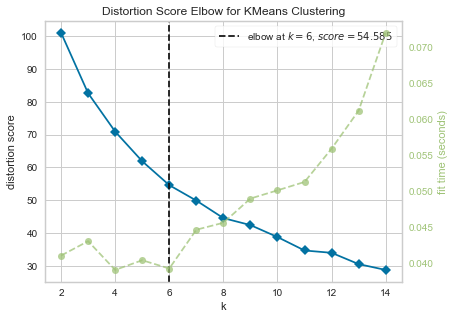

'visualizer = KElbowVisualizer(KMeans(n_init=100, max_iter=10000, algorithm="elkan"), k=(2,15), metric="calinski_harabasz")\nvisualizer.fit(data_arr)        # Fit the data to the visualizer\nvisualizer.show()        # Finalize and render the figure\n\nvisualizer = KElbowVisualizer(KMeans(n_init=100, max_iter=10000, algorithm="elkan"), k=(2,15), metric="silhouette")\nvisualizer.fit(data_arr)        # Fit the data to the visualizer\nvisualizer.show()        # Finalize and render the figure'

In [117]:
'''distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=100, max_iter=10000) # , algorithm="elkan")
    kmeanModel.fit(data_arr)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()'''

kmeans_visualizer1 = KElbowVisualizer(KMeans(n_init=100, max_iter=10000, algorithm="elkan"), k=(2,15))
kmeans_visualizer1.fit(data_arr)        # Fit the data to the visualizer
kmeans_visualizer1.show()        # Finalize and render the figure

kmeans_visualizer2 = KElbowVisualizer(KMeans(), k=(2,15))
kmeans_visualizer2.fit(data_arr)        # Fit the data to the visualizer
kmeans_visualizer2.show()        # Finalize and render the figure

'''visualizer = KElbowVisualizer(KMeans(n_init=100, max_iter=10000, algorithm="elkan"), k=(2,15), metric="calinski_harabasz")
visualizer.fit(data_arr)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

visualizer = KElbowVisualizer(KMeans(n_init=100, max_iter=10000, algorithm="elkan"), k=(2,15), metric="silhouette")
visualizer.fit(data_arr)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure'''

[4, 5, 6, 7]

For n_clusters = 4 The average silhouette_score is : 0.26900795974349506
For n_clusters = 5 The average silhouette_score is : 0.2713269982194152
For n_clusters = 6 The average silhouette_score is : 0.28653704626467336
For n_clusters = 7 The average silhouette_score is : 0.2814057695588016


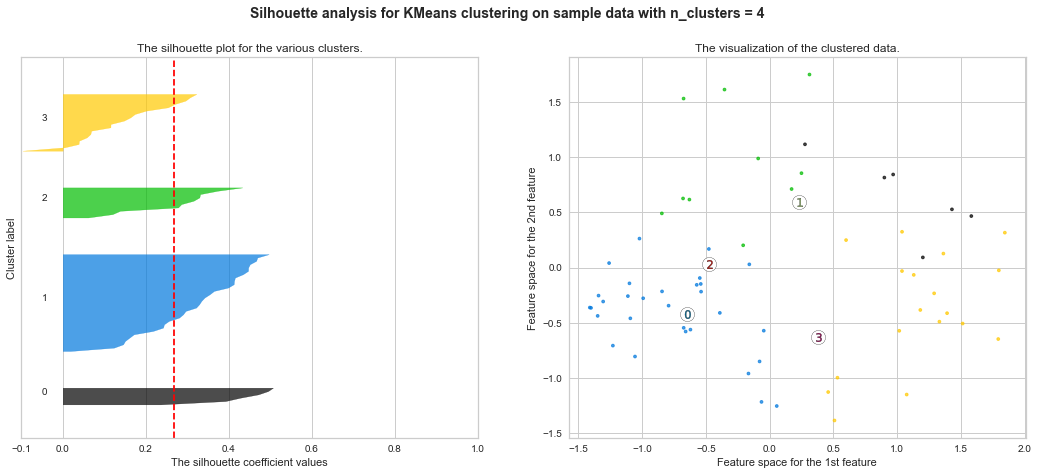

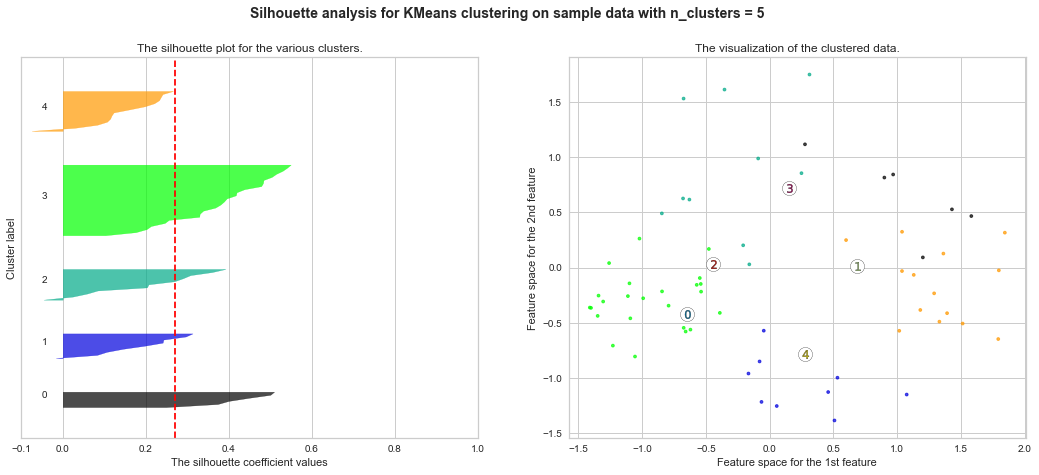

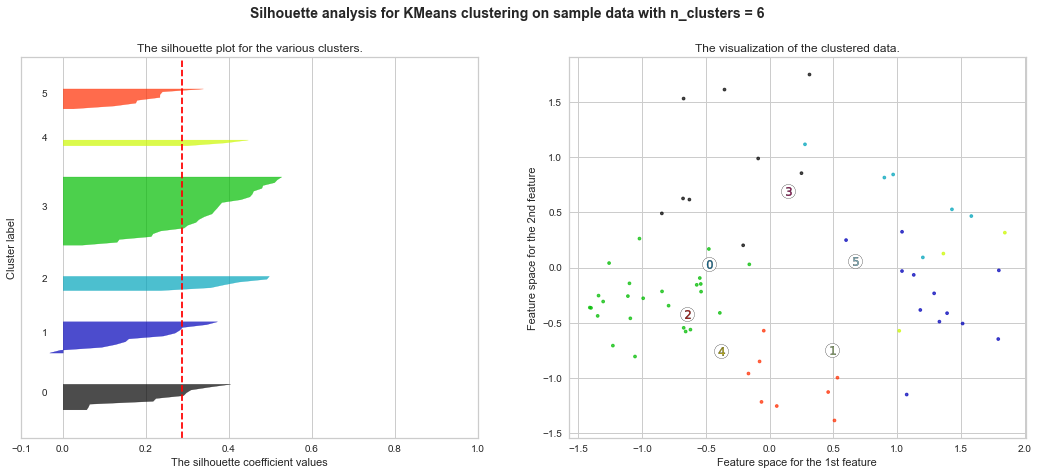

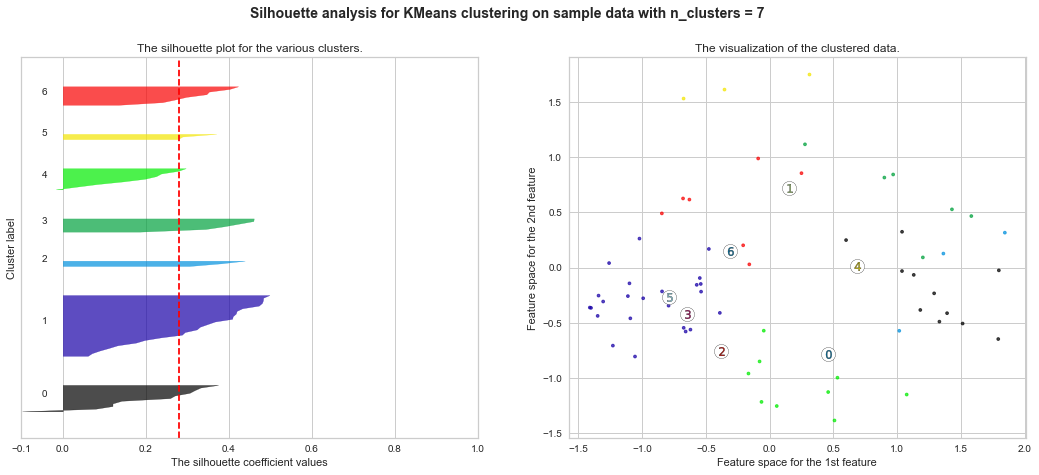

In [118]:
range_n_clusters = list(range(max(min(kmeans_visualizer1.elbow_value_,kmeans_visualizer2.elbow_value_)-2,2),max(kmeans_visualizer1.elbow_value_,kmeans_visualizer2.elbow_value_)+2))
display(range_n_clusters)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_arr) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init=100, max_iter=10000, algorithm="elkan")
    cluster_labels = clusterer.fit_predict(data_arr)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_arr, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_arr, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data_arr_2d[:, 0], data_arr_2d[:, 1], marker=".", s=30, lw=1, alpha=0.7, c=colors, edgecolor=colors
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=75, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

[4, 5, 6, 7]

For n_clusters = 4 The average silhouette_score is : 0.26437597072817887
For n_clusters = 5 The average silhouette_score is : 0.2604995804740727
For n_clusters = 6 The average silhouette_score is : 0.27475436538950704
For n_clusters = 7 The average silhouette_score is : 0.2277473526198034


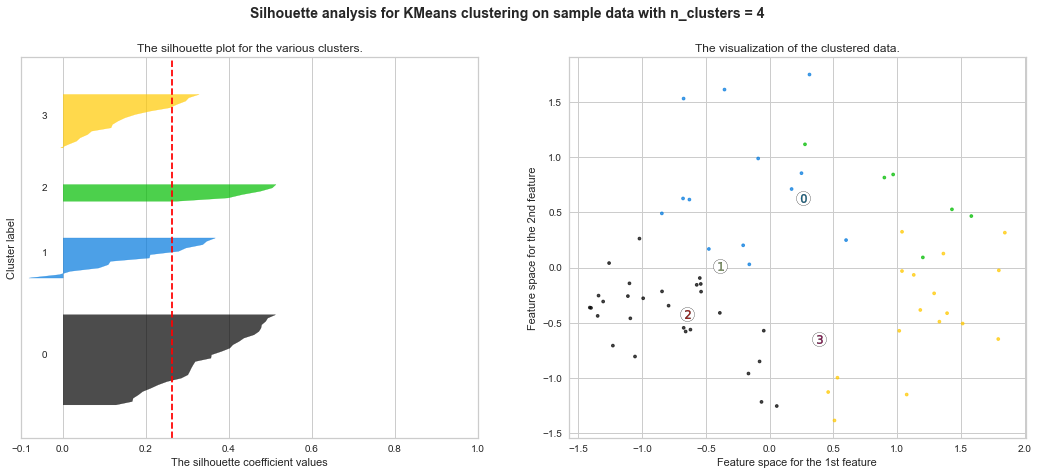

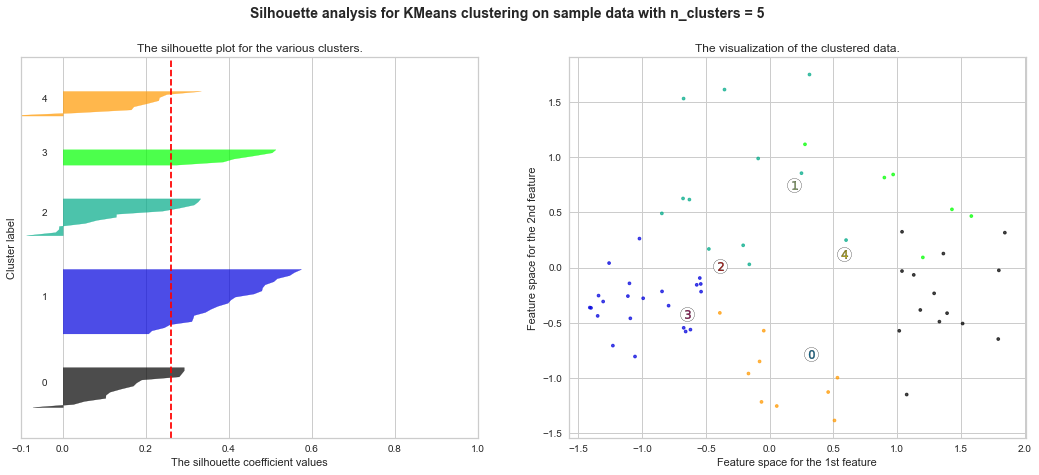

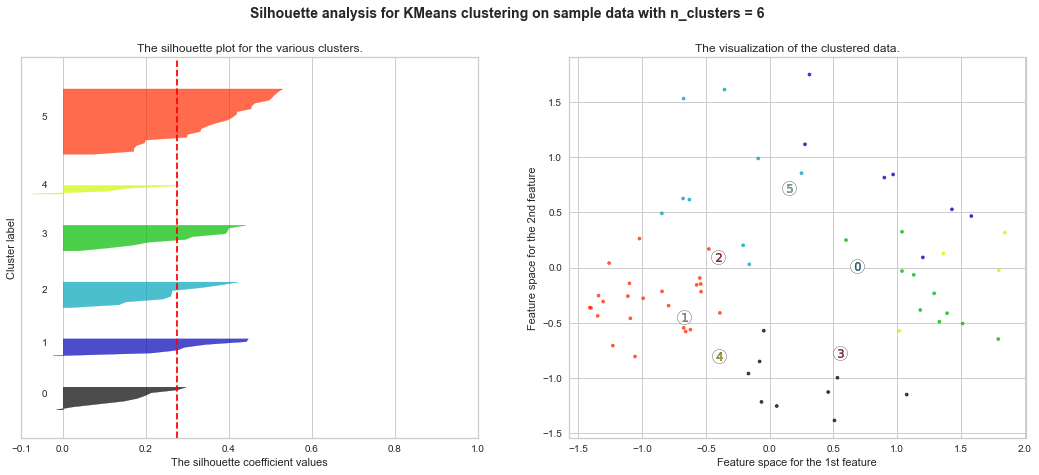

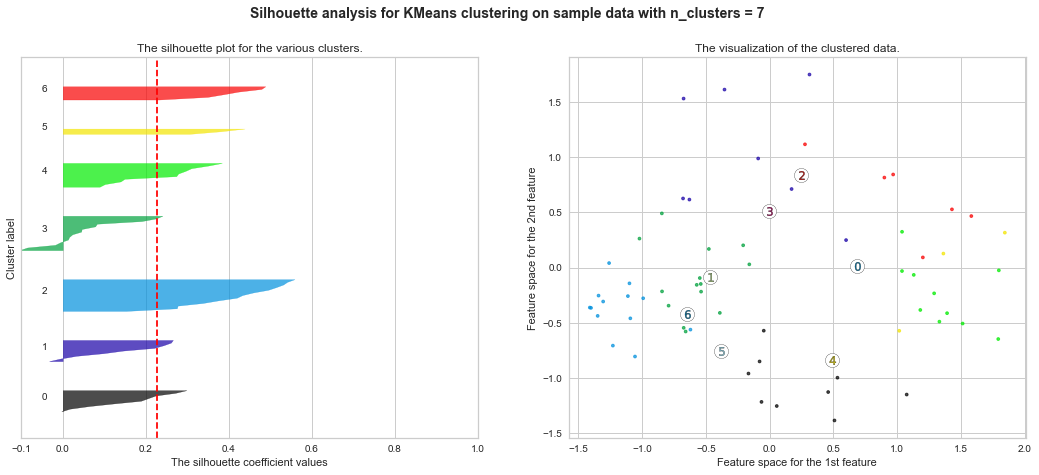

In [119]:
range_n_clusters = list(range(max(min(kmeans_visualizer1.elbow_value_,kmeans_visualizer2.elbow_value_)-2,2),max(kmeans_visualizer1.elbow_value_,kmeans_visualizer2.elbow_value_)+2))
display(range_n_clusters)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_arr) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(data_arr)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_arr, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_arr, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data_arr_2d[:, 0], data_arr_2d[:, 1], marker=".", s=30, lw=1, alpha=0.7, c=colors, edgecolor=colors
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=75, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

ELBOW METHOD - KMEDOIDS

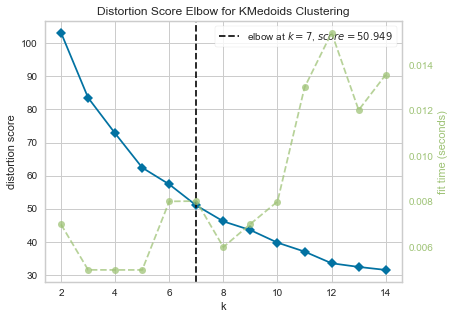

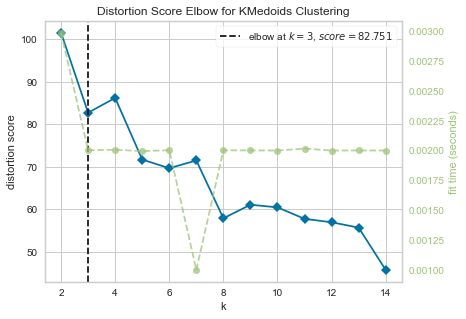

'visualizer = KElbowVisualizer(KMeans(n_init=100, max_iter=10000, algorithm="elkan"), k=(2,15), metric="calinski_harabasz")\nvisualizer.fit(data_arr)        # Fit the data to the visualizer\nvisualizer.show()        # Finalize and render the figure\n\nvisualizer = KElbowVisualizer(KMeans(n_init=100, max_iter=10000, algorithm="elkan"), k=(2,15), metric="silhouette")\nvisualizer.fit(data_arr)        # Fit the data to the visualizer\nvisualizer.show()        # Finalize and render the figure'

In [120]:
'''distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=100, max_iter=10000) # , algorithm="elkan")
    kmeanModel.fit(data_arr)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()'''

kmed_visualizer1 = KElbowVisualizer(KMedoids(metric="cosine", init="heuristic", max_iter=10000, method="pam"), k=(2,15))
kmed_visualizer1.fit(data_arr)        # Fit the data to the visualizer
kmed_visualizer1.show()        # Finalize and render the figure

kmed_visualizer2 = KElbowVisualizer(KMedoids(), k=(2,15))
kmed_visualizer2.fit(data_arr)        # Fit the data to the visualizer
kmed_visualizer2.show()        # Finalize and render the figure

'''visualizer = KElbowVisualizer(KMeans(n_init=100, max_iter=10000, algorithm="elkan"), k=(2,15), metric="calinski_harabasz")
visualizer.fit(data_arr)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

visualizer = KElbowVisualizer(KMeans(n_init=100, max_iter=10000, algorithm="elkan"), k=(2,15), metric="silhouette")
visualizer.fit(data_arr)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure'''

[2, 3, 4, 5, 6, 7, 8]

For n_clusters = 2 The average silhouette_score is : 0.2801384386470676
For n_clusters = 3 The average silhouette_score is : 0.2554036712229848
For n_clusters = 4 The average silhouette_score is : 0.23424513629476157
For n_clusters = 5 The average silhouette_score is : 0.25082709929584246
For n_clusters = 6 The average silhouette_score is : 0.23000717397802364
For n_clusters = 7 The average silhouette_score is : 0.24054436120345463
For n_clusters = 8 The average silhouette_score is : 0.25116560321382464


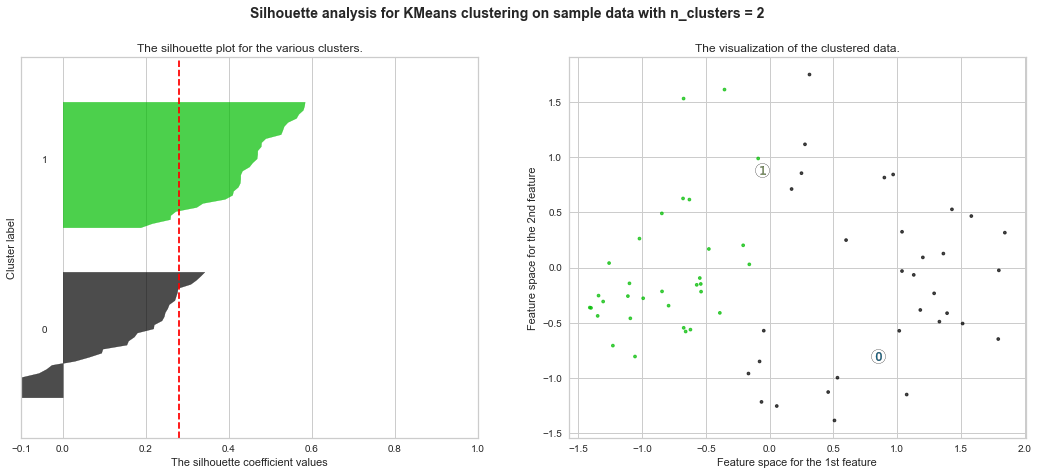

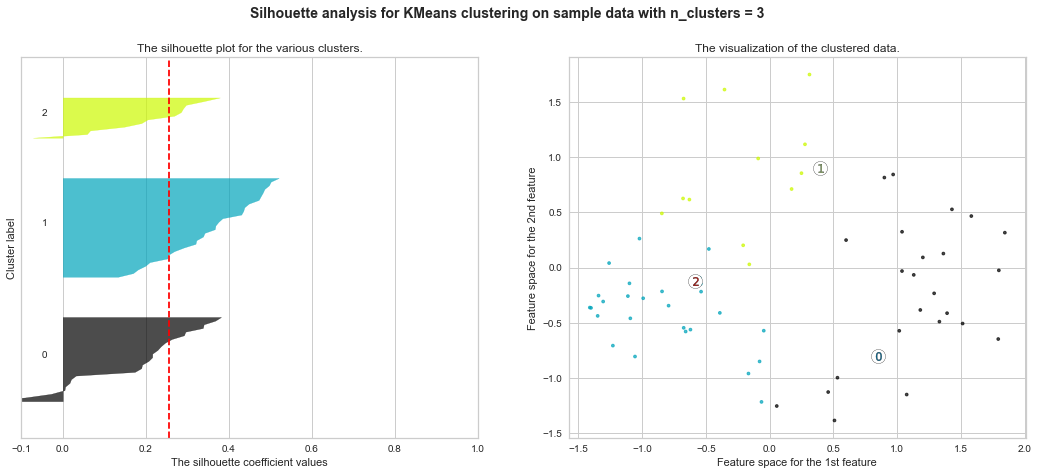

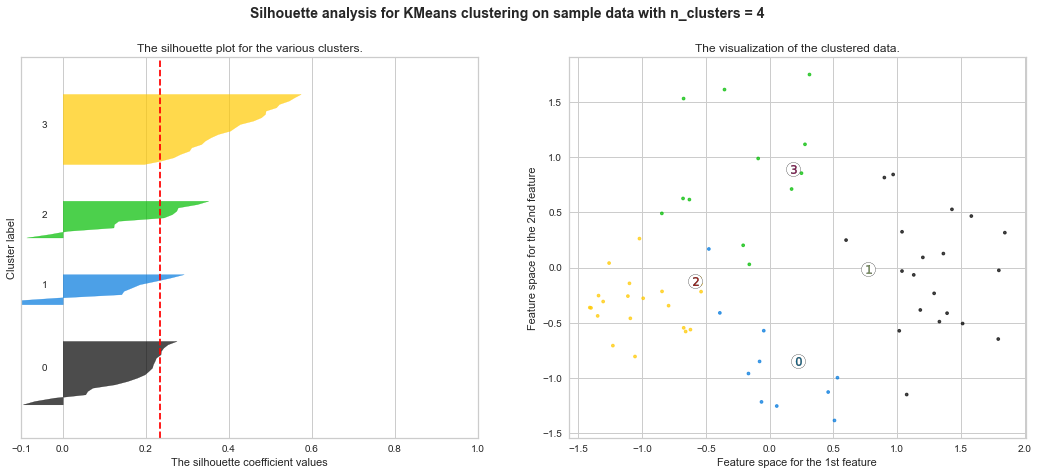

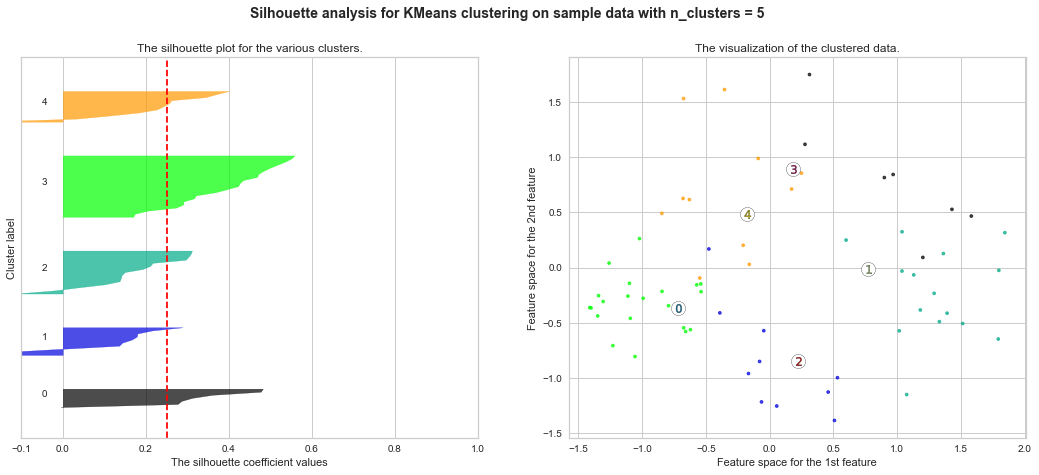

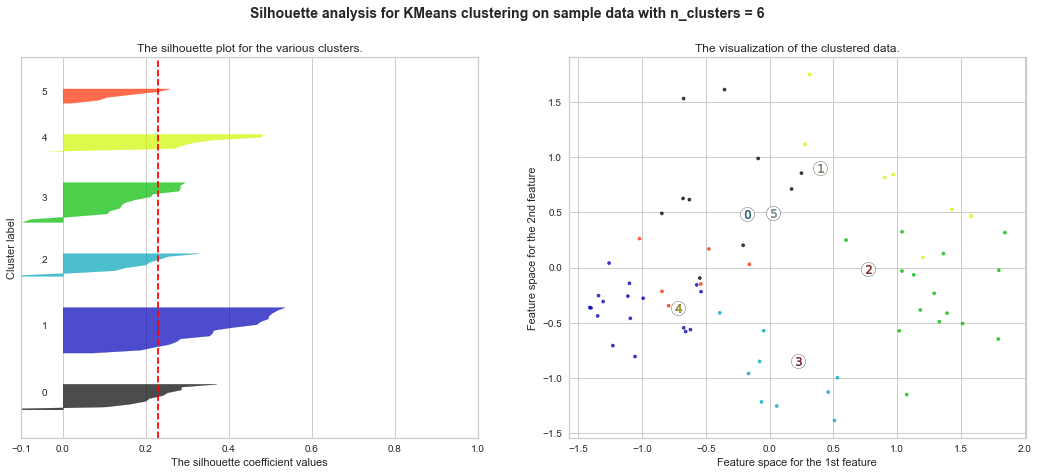

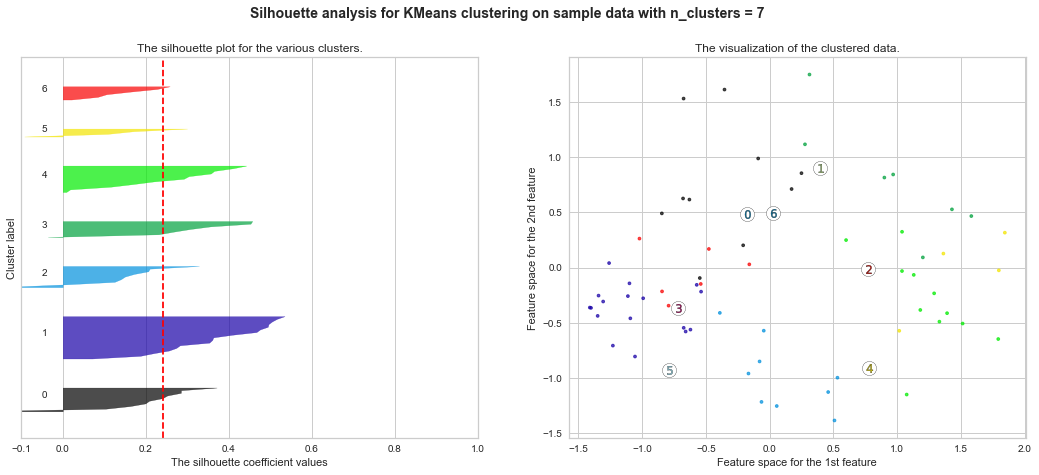

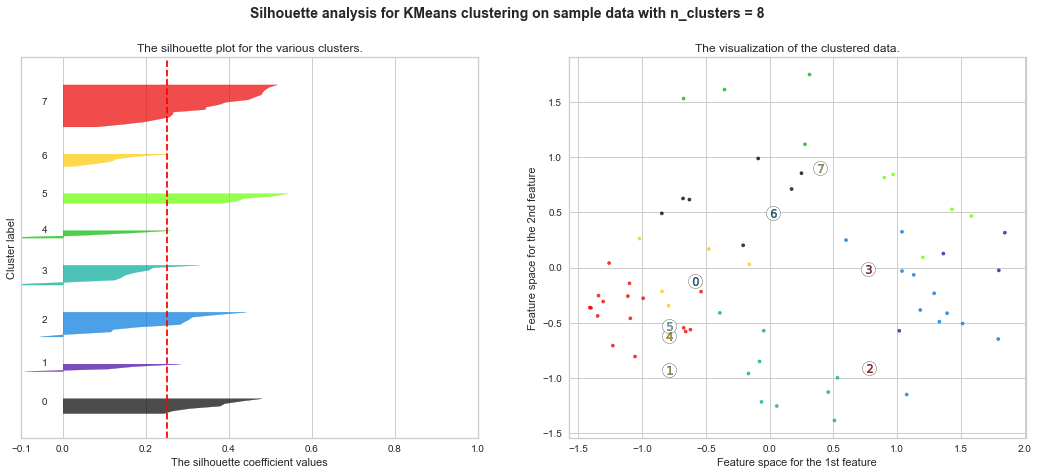

In [121]:
range_n_clusters = list(range(max(min(kmed_visualizer1.elbow_value_,kmed_visualizer2.elbow_value_)-2,2),max(kmed_visualizer1.elbow_value_,kmed_visualizer2.elbow_value_)+2))
display(range_n_clusters)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_arr) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMedoids(n_clusters=n_clusters, metric="cosine", init="heuristic", max_iter=10000, method="pam")
    cluster_labels = clusterer.fit_predict(data_arr)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_arr, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_arr, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data_arr_2d[:, 0], data_arr_2d[:, 1], marker=".", s=30, lw=1, alpha=0.7, c=colors, edgecolor=colors
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=75, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

[2, 3, 4, 5, 6, 7, 8]

For n_clusters = 2 The average silhouette_score is : 0.3097708424337585
For n_clusters = 3 The average silhouette_score is : 0.2608616644929145
For n_clusters = 4 The average silhouette_score is : 0.1547964537668628
For n_clusters = 5 The average silhouette_score is : 0.1862949113125851
For n_clusters = 6 The average silhouette_score is : 0.14730915987661444
For n_clusters = 7 The average silhouette_score is : 0.0836569410940476
For n_clusters = 8 The average silhouette_score is : 0.14713252674936642


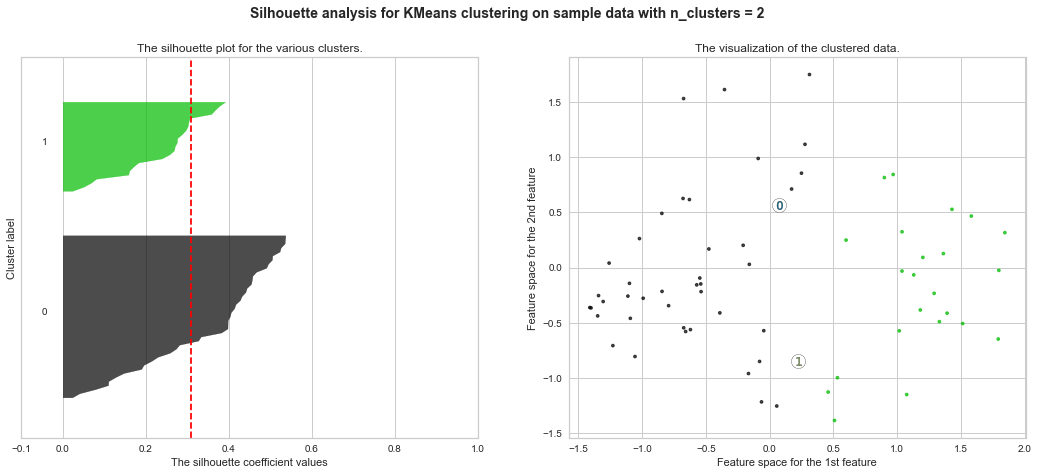

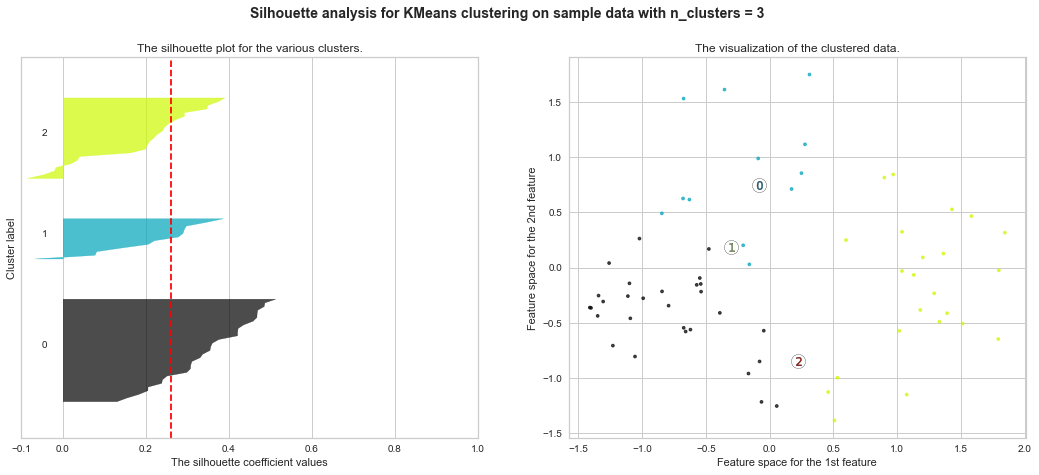

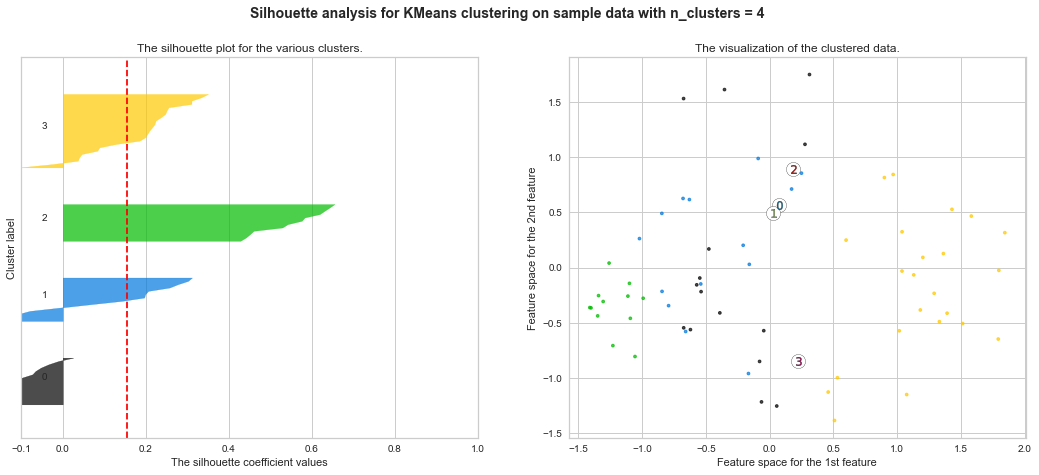

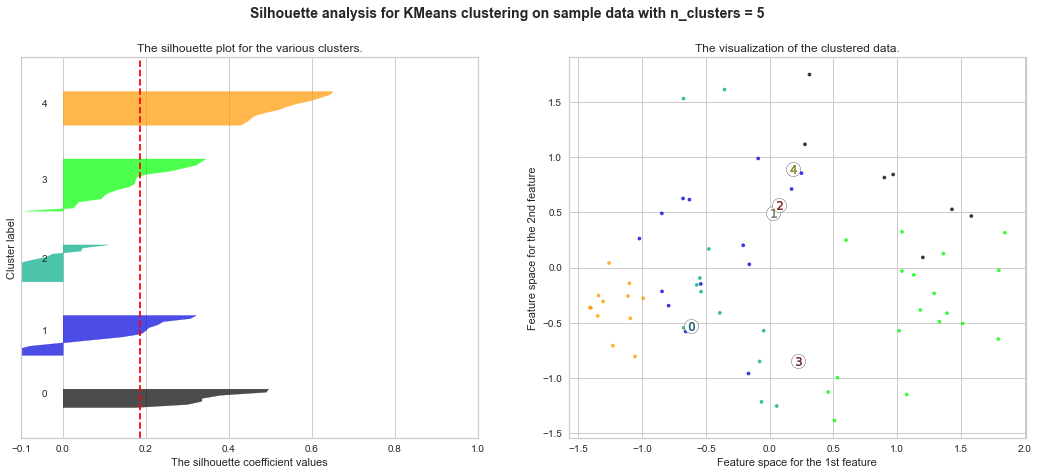

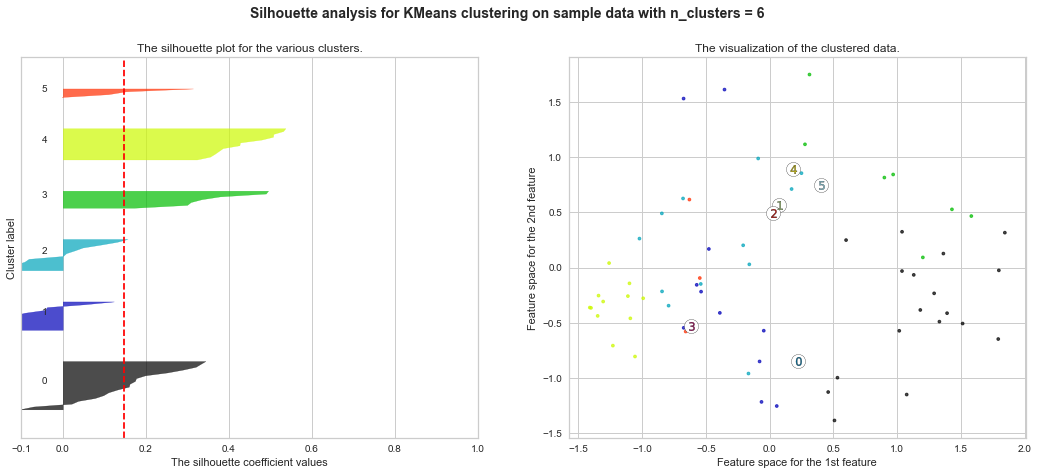

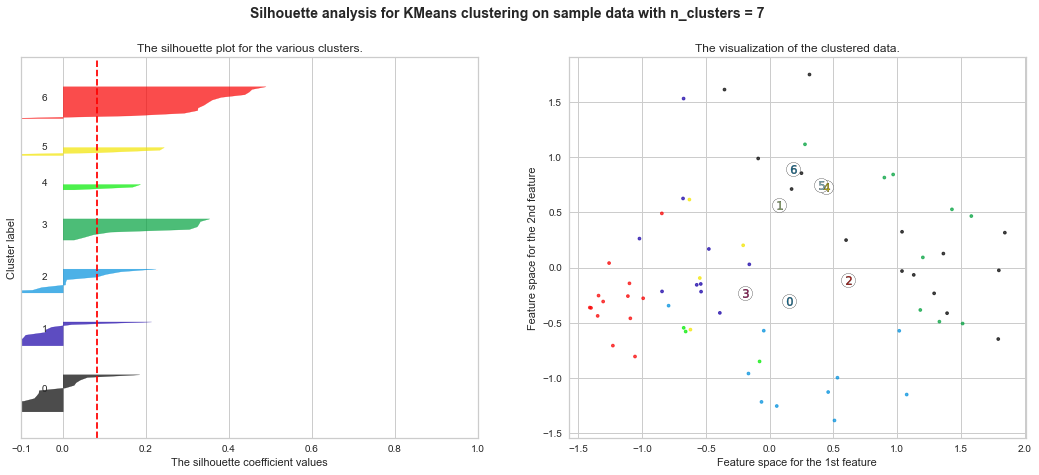

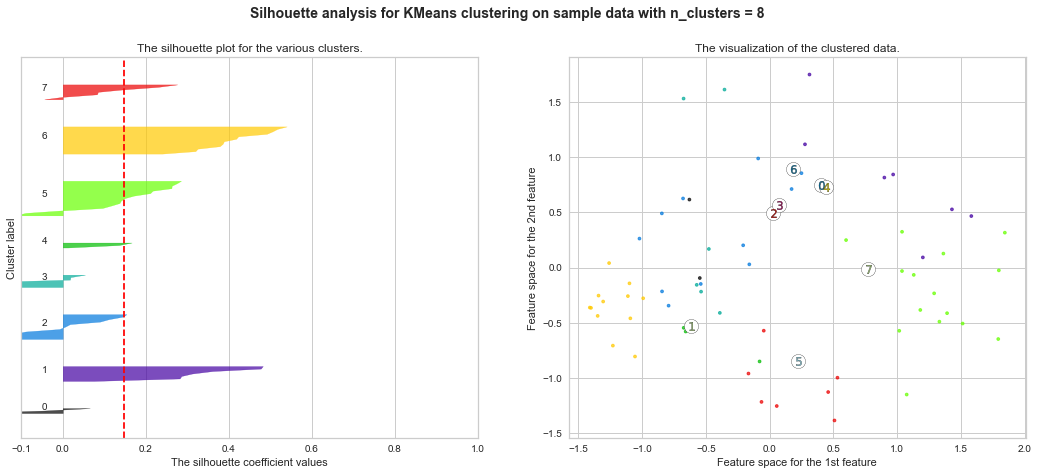

In [122]:
range_n_clusters = list(range(max(min(kmed_visualizer1.elbow_value_,kmed_visualizer2.elbow_value_)-2,2),max(kmed_visualizer1.elbow_value_,kmed_visualizer2.elbow_value_)+2))
display(range_n_clusters)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_arr) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMedoids(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(data_arr)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_arr, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_arr, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data_arr_2d[:, 0], data_arr_2d[:, 1], marker=".", s=30, lw=1, alpha=0.7, c=colors, edgecolor=colors
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=75, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

X-MEANS METHOD

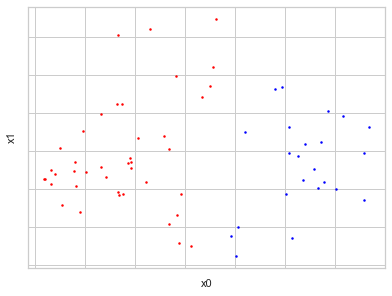

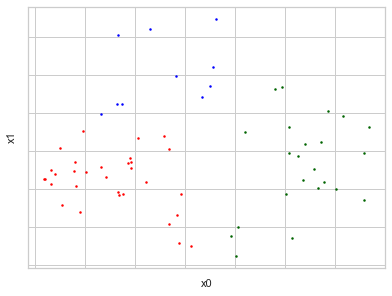

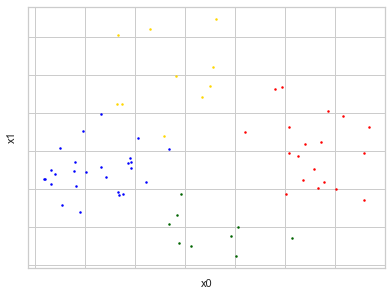

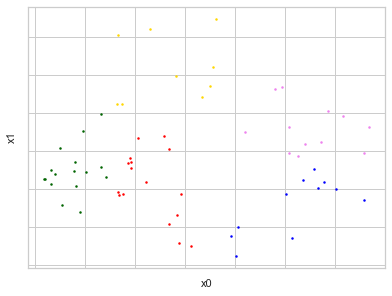

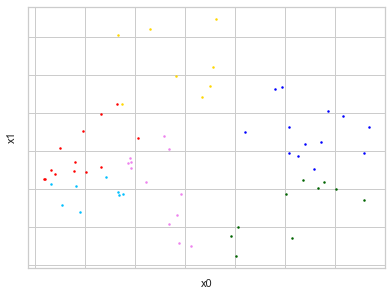

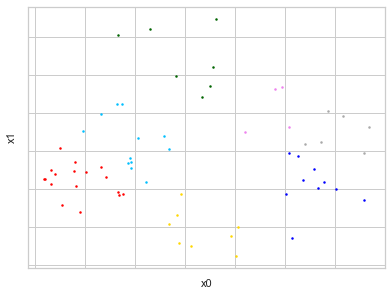

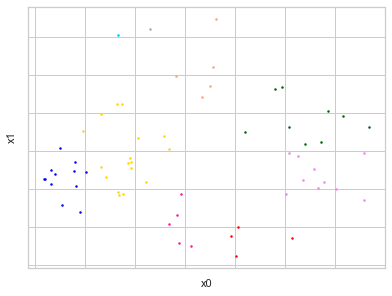

In [123]:
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FAMOUS_SAMPLES
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.xmeans import xmeans

# load 4D data sample 'Iris'
sample_4d = list(data_arr_2d) # read_sample(FAMOUS_SAMPLES.SAMPLE_IRIS)
# display(sample_4d)
# initialize 3 initial centers using K-Means++ algorithm
for n in range_n_clusters:    
    centers = kmeans_plusplus_initializer(sample_4d, n).initialize()
    # performs cluster analysis using X-Means
    xmeans_instance = xmeans(sample_4d, centers)
    xmeans_instance.process()
    clusters = xmeans_instance.get_clusters()
    # display(clusters)
    # visualize obtained clusters in multi-dimensional space
    visualizer = cluster_visualizer_multidim()
    visualizer.append_clusters(clusters, sample_4d)
    visualizer.show(max_row_size=5) # max_row_size=3)